In [79]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [80]:
# Load dataset

# dtypes = {'User_profile_link':'category','User_name':'category','Review_date':'category','Product_name':'category','review_title':'category', 'review_text':'category', 'first_breadcrumb':'category', 'RevDescription':'category', 'second_breadcrumb':'category', 'all_breadcrumbs':'category', 'price':'category', 'url_product':'category', 'name':'category', 'verified':'category'}

dtypes = {'Userprofile_url':'category','Username':'category','Reviewdate':'category','Productname':'category','review_title':'category', 'review_text':'category', 'categoryfirst_breadcrumb':'category', 'allbreadcrumbs':'category', 'price':'category', 'urlproduct':'category', 'verified_review':'category'}

df_website1 = pd.read_excel("../2_Pre_Analysis/Output_after_pre_analysis.xlsx")


In [81]:
# Describe dataset
summary=df_website1.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq
Userprofile_url,16741,1906,https://www.amazon.com/gp/profile/amzn1.accoun...,33
Username,16741,1677,Amazon Customer,1118
Reviewdate,16741,2283,17/02/2023,55
Productname,16741,13578,Levi's Men's 559 Relaxed Straight Jeans (Also ...,1298
review_title,16741,12800,Five Stars,267
review_text,16741,15915,Perfect,42
categoryfirst_breadcrumb,16737,64,"Clothing, Shoes & Jewelry",4775
allbreadcrumbs,16725,4722,"Men, Clothing, Jeans",1456
price,16741,3011,price_unavailable,5820
urlproduct,16741,15170,https://www.amazon.com/Levis-Mens-Relaxed-Stra...,557


In [82]:
# Read the product categories from Amazon Excel file
categories_website1 = df_website1['categoryfirst_breadcrumb'].tolist()

print(categories_website1)

['Toys & Games', 'Toys & Games', 'Clothing, Shoes & Jewelry', 'Arts, Crafts & Sewing', 'Toys & Games', 'Clothing, Shoes & Jewelry', 'Clothing, Shoes & Jewelry', 'Arts, Crafts & Sewing', 'unavailable', 'unavailable', 'unavailable', 'unavailable', 'unavailable', 'Clothing, Shoes & Jewelry', 'unavailable', 'unavailable', 'unavailable', 'Office Products', 'Clothing, Shoes & Jewelry', 'Cell Phones & Accessories', 'Clothing, Shoes & Jewelry', 'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Clothing, Shoes & Jewelry', 'Clothing, Shoes & Jewelry', 'Movies & TV', 'unavailable', 'Clothing, Shoes & Jewelry', 'Tools & Home Improvement', 'Electronics', 'Movies & TV', 'Clothing, Shoes & Jewelry', 'Home & Kitchen', 'Automotive', 'Automotive', 'Cell Phones & Accessories', 'Tools & Home Improvement', 'Tools & Home Improvement', 'Home & Kitchen', 'Sports & Outdoors', 'Clothing, Shoes & Jewelry', 'Automotive', 'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Automotive', 'Home & Kitchen', 'Automotiv

In [83]:
# Read the product categories from Amazon Excel file and exclude duplicates 
categories_website1 = df_website1['categoryfirst_breadcrumb'].tolist()
unique_categories_website1 = list(set(categories_website1))

print(unique_categories_website1)

['Power Tool Parts & Accessories', 'Unscripted', 'Beauty & Personal Care', 'Shoe, Jewelry & Watch Accessories', 'Appstore for Android', 'unavailable', 'Sports & Outdoors', 'Electronics', 'Patio, Lawn & Garden', 'Documentary', 'Action', 'Horror', 'Home & Kitchen', 'Science Fiction', 'Comedy', 'Young Adult Audience', 'Food Service Equipment & Supplies', 'Appliances', 'Musical Instruments', 'Camera & Photo', 'Drama', 'Cell Phones & Accessories', 'Software', 'Grills & Outdoor Cooking', 'Home Audio & Theater', 'Automotive', 'Clothing, Shoes & Jewelry', 'Historical', 'Baby Products', 'Grocery & Gourmet Food', 'Remote & App Controlled Vehicle Parts', 'Office Products', 'Health & Household', 'Kindle Store', 'Arts, Crafts & Sewing', 'Grocery', 'Arts, Entertainment, and Culture', nan, 'Lighting Assemblies & Accessories', 'Remote & App Controlled Vehicles & Parts', 'Movies & TV', 'Collectibles & Fine Art', 'Fantasy', 'CDs & Vinyl', 'Kindle eBooks', 'Amazon Devices', 'Animation', 'Lights & Lightin

In [84]:
# Prepossed categories from Amazon Excel File
cleaned_categories = []

for category in unique_categories_website1:
    if category == 0:
        continue  # Skip preprocessing for category equal to 0
    
    if isinstance(category, int):
        continue  # Skip preprocessing for int category
        
    if isinstance(category, float):
        continue  # Skip preprocessing for float category
    
    if not category.strip():  # Check if category is blank or empty
        continue  # Skip preprocessing for blank category
    
for category in unique_categories_website1:
    # Remove HTML tags and special characters using BeautifulSoup
    category_text = BeautifulSoup(str(category), 'html.parser').get_text()
    cleaned_category = re.sub(r'[^\w\s]', '', category_text)
    cleaned_category = cleaned_category.lower()  # Convert to lowercase
    cleaned_category = re.sub(' +', ' ', cleaned_category)  # Replace consecutive spaces
    cleaned_categories.append(cleaned_category)

print(cleaned_categories)

['power tool parts accessories', 'unscripted', 'beauty personal care', 'shoe jewelry watch accessories', 'appstore for android', 'unavailable', 'sports outdoors', 'electronics', 'patio lawn garden', 'documentary', 'action', 'horror', 'home kitchen', 'science fiction', 'comedy', 'young adult audience', 'food service equipment supplies', 'appliances', 'musical instruments', 'camera photo', 'drama', 'cell phones accessories', 'software', 'grills outdoor cooking', 'home audio theater', 'automotive', 'clothing shoes jewelry', 'historical', 'baby products', 'grocery gourmet food', 'remote app controlled vehicle parts', 'office products', 'health household', 'kindle store', 'arts crafts sewing', 'grocery', 'arts entertainment and culture', 'nan', 'lighting assemblies accessories', 'remote app controlled vehicles parts', 'movies tv', 'collectibles fine art', 'fantasy', 'cds vinyl', 'kindle ebooks', 'amazon devices', 'animation', 'lights lighting accessories', 'handmade products', 'suspense', '

In [85]:
# Create a dataframe with the cleaned categories
df_cleaned_categories = pd.DataFrame({'Cleaned Categories': cleaned_categories})

# Print the dataframe
print(df_cleaned_categories)

                   Cleaned Categories
0        power tool parts accessories
1                          unscripted
2                beauty personal care
3      shoe jewelry watch accessories
4                appstore for android
..                                ...
60                         toys games
61             tools home improvement
62                        video games
63  small appliance parts accessories
64              industrial scientific

[65 rows x 1 columns]


In [86]:
# Read the product categories from Google Affinity list Excel file
df_website2 = pd.read_excel('googleaffinitylist.xlsx', sheet_name='Sheet1')
categories_website2 = df_website2['Column1'].tolist()

print(categories_website2)

['/Banking & Finance', '/Banking & Finance/ Avid Investors', '/Banking & Finance/ Banks Online', '/Beauty & Wellness', '/Beauty & Wellness/ Beauty Mavens', '/Beauty & Wellness/ Frequently Visits Salons', '/Food & Dining', '/Food & Dining/ Coffee Shop Regulars', '/Food & Dining/ Cooking Enthusiasts', '/Food & Dining/ Cooking Enthusiasts/ 30 Minute Chefs', '/Food & Dining/ Cooking Enthusiasts/ Aspiring Chefs', '/Food & Dining/ Fast Food Cravers', '/Food & Dining/ Foodies', '/Food & Dining/ Frequently Dines Out', '/Food & Dining/ Frequently Dines Out/ Diners by Meal', '/Food & Dining/ Frequently Dines Out/ Diners by Meal/ Frequently Eats Breakfast Out', '/Food & Dining/ Frequently Dines Out/ Diners by Meal/ Frequently Eats Dinner Out', '/Food & Dining/ Frequently Dines Out/ Diners by Meal/ Frequently Eats Lunch Out', '/Food & Dining/ Prefers Organic Food', '/Food & Dining/ Vegetarians & Vegans', '/Food & Dining/ Vegetarians & Vegans/ Vegans', '/Home & Garden', '/Home & Garden/ Do-It-Yours

In [87]:
# Prepossed categories from Google Affinity list Excel File
cleaned_categories2 = []

for category in categories_website2:
    # Remove HTML tags and special characters using BeautifulSoup
    category_text = BeautifulSoup(category, 'html.parser').get_text()
    cleaned_category = re.sub(r'[^\w\s]', '', category_text)
    cleaned_category = cleaned_category.lower()  # Convert to lowercase
    cleaned_category = re.sub(' +', ' ', cleaned_category)  # Replace consecutive spaces
    cleaned_categories2.append(cleaned_category)

print(cleaned_categories2)

['banking finance', 'banking finance avid investors', 'banking finance banks online', 'beauty wellness', 'beauty wellness beauty mavens', 'beauty wellness frequently visits salons', 'food dining', 'food dining coffee shop regulars', 'food dining cooking enthusiasts', 'food dining cooking enthusiasts 30 minute chefs', 'food dining cooking enthusiasts aspiring chefs', 'food dining fast food cravers', 'food dining foodies', 'food dining frequently dines out', 'food dining frequently dines out diners by meal', 'food dining frequently dines out diners by meal frequently eats breakfast out', 'food dining frequently dines out diners by meal frequently eats dinner out', 'food dining frequently dines out diners by meal frequently eats lunch out', 'food dining prefers organic food', 'food dining vegetarians vegans', 'food dining vegetarians vegans vegans', 'home garden', 'home garden doityourselfers', 'home garden home decor enthusiasts', 'lifestyles hobbies', 'lifestyles hobbies art theater afi

C:\Users\dvadi\AppData\Local\Temp\ipykernel_12836\4137786424.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  category_text = BeautifulSoup(category, 'html.parser').get_text()


In [88]:
# Create a dataframe with the cleaned categories
df_cleaned_categories2 = pd.DataFrame({'Cleaned Categories2': cleaned_categories2})

# Print the dataframe
print(df_cleaned_categories2)

                                   Cleaned Categories2
0                                      banking finance
1                       banking finance avid investors
2                         banking finance banks online
3                                      beauty wellness
4                        beauty wellness beauty mavens
..                                                 ...
149  vehicles transportation auto enthusiasts perfo...
150  vehicles transportation auto enthusiasts truck...
151       vehicles transportation transportation modes
152  vehicles transportation transportation modes p...
153  vehicles transportation transportation modes t...

[154 rows x 1 columns]


In [89]:
df_cleaned_categories2.to_excel("cleaned_google_affinity.xlsx", index=False)

In [90]:
# Combine the categories from both websites
#all_categories = categories_website1 + categories_website2
#all_categories = unique_categories_website1 + categories_website2
#all_categories = cleaned_categories + cleaned_categories2
all_categories = list(df_cleaned_categories['Cleaned Categories']) + list(df_cleaned_categories2['Cleaned Categories2'])

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()


In [91]:
# Fit and transform the vectorizer on the combined categories
vectorized_categories = vectorizer.fit_transform(all_categories)


In [92]:
# Transform text data
tfidf_categories = vectorizer.transform(df_cleaned_categories['Cleaned Categories'])
tfidf_categories2 = vectorizer.transform(df_cleaned_categories2['Cleaned Categories2'])


In [93]:
# Calculate the cosine similarity between the vectorized categories
similarity_matrix = cosine_similarity(tfidf_categories, tfidf_categories2)


# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, columns=cleaned_categories2, index=cleaned_categories)

# Write the similarity scores to an Excel file
similarity_df.to_excel('cousinesimilarity_scores.xlsx', index=True)

# Print the DataFrame
similarity_df.head()

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
power tool parts accessories,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unscripted,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beauty personal care,0.0,0.0,0.0,0.352554,0.399881,0.212864,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shoe jewelry watch accessories,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
appstore for android,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


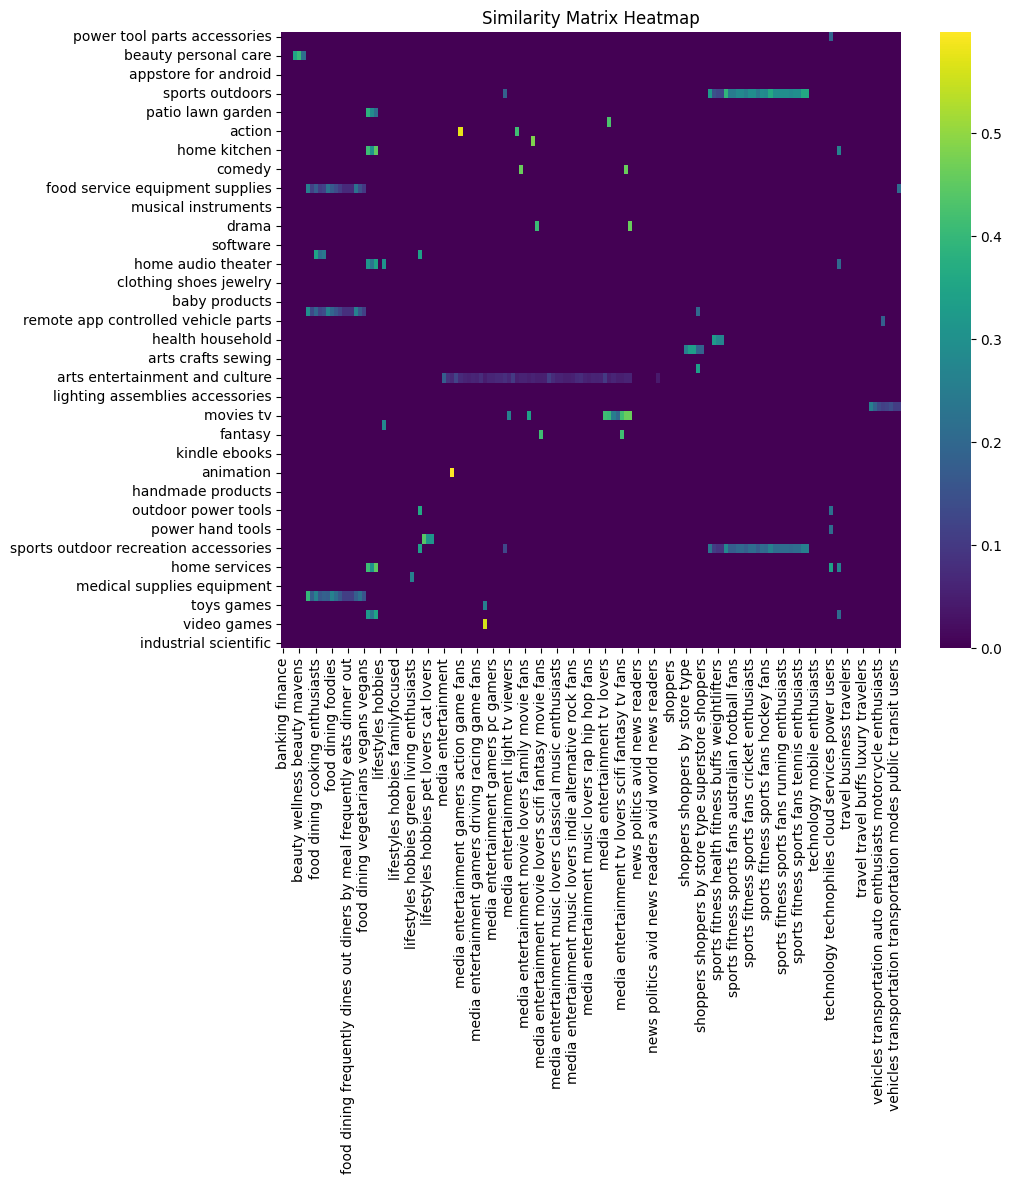

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.show()

In [95]:
# Remove columns and rows with similarity below 0,2 (done but not working). Print resut (not done)
similarity_df2 = similarity_df.copy()
similarity_df2[similarity_df2 < 0.4] = np.nan

similarity_df.head()

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
power tool parts accessories,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unscripted,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beauty personal care,0.0,0.0,0.0,0.352554,0.399881,0.212864,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shoe jewelry watch accessories,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
appstore for android,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


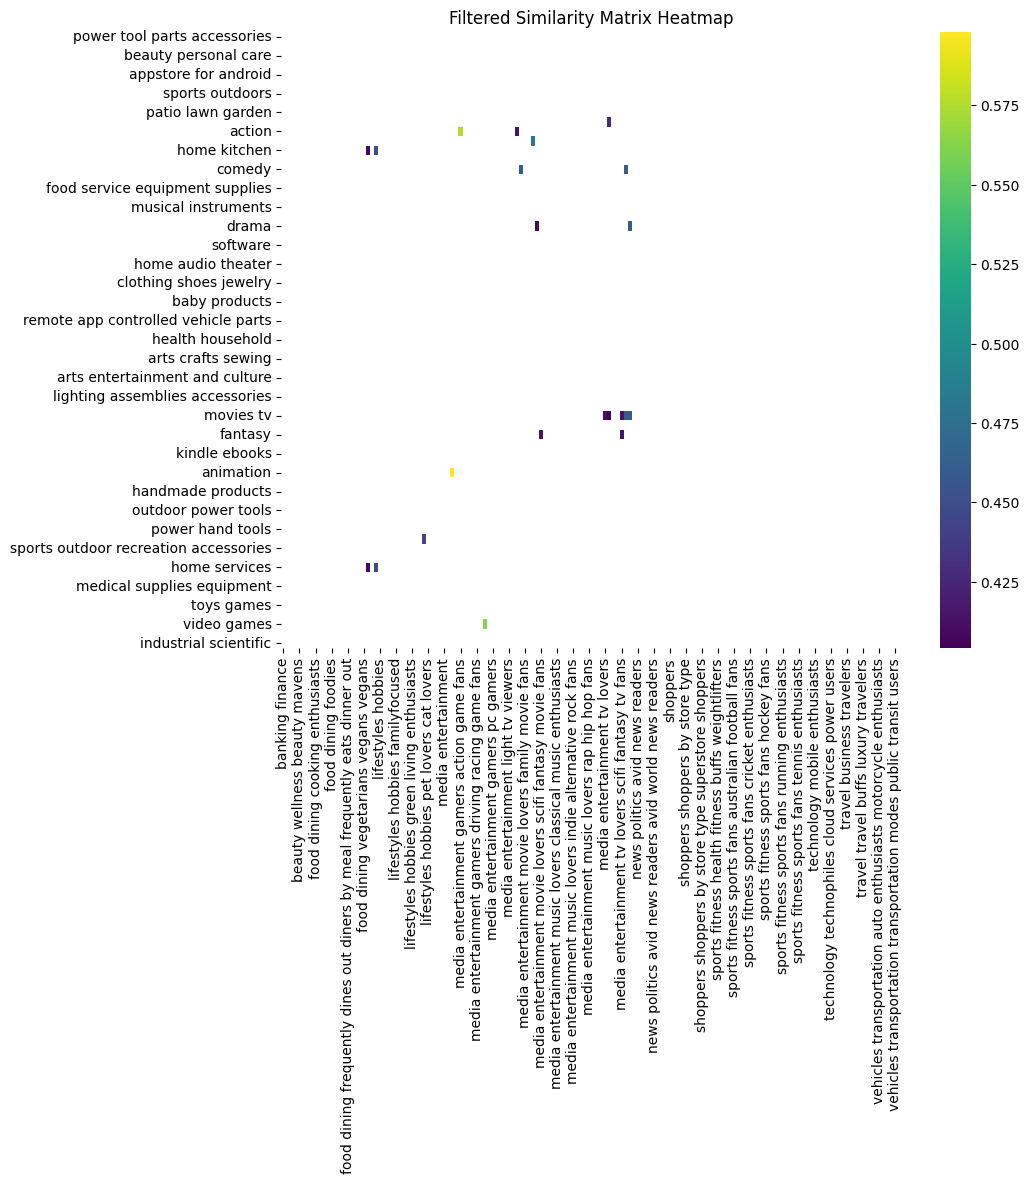

In [96]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df2, cmap='viridis')
plt.title("Filtered Similarity Matrix Heatmap")
plt.show()

# Using Word2Vec for Similarity Matrix

In [126]:
# from gensim.models import KeyedVectors

# loaded_model = KeyedVectors.load("../5_Experimental/word2vec-google-news-300.model")

In [ ]:
import gensim.downloader as api

# Load the Word2Vec model
loaded_model = api.load("word2vec-google-news-300")

In [98]:
def text_to_vector(text, model):
    # Retrieve vector representation for each word and ignore words not in the model's vocabulary
    vectors = [model[word] for word in text if word in model.key_to_index]
    
    # Return the average of the vectors
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [99]:
# Convert each word in text1 to its vector representation
vec1_list = [text_to_vector(sentence.split(), loaded_model) for sentence in list(df_cleaned_categories['Cleaned Categories'])]

# Convert each sentence in text2 to its vector representation
vec2_list = [text_to_vector(sentence.split(), loaded_model) for sentence in list(df_cleaned_categories2['Cleaned Categories2'])]


In [100]:
similarity_matrix_w2v = cosine_similarity(vec1_list, vec2_list)

# Create a DataFrame from the similarity matrix
similarity_df_w2v = pd.DataFrame(similarity_matrix_w2v, columns=list(df_cleaned_categories2['Cleaned Categories2']), index=list(df_cleaned_categories['Cleaned Categories']))

# Write the similarity scores to an Excel file
similarity_df_w2v.to_excel('cousinesimilarity_scores_w2v.xlsx', index=True)

# Print the DataFrame
similarity_df_w2v.head()

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
power tool parts accessories,0.091887,0.144400,0.160199,0.193951,0.255381,0.245811,0.104886,0.170429,0.240214,0.198879,...,0.262328,0.217646,0.273168,0.412219,0.404296,0.441178,0.382710,0.332236,0.320964,0.354523
unscripted,0.032873,0.077018,0.069674,0.105229,0.142578,0.142138,0.128441,0.132540,0.156328,0.226897,...,0.079228,0.094742,0.104983,0.126515,0.131227,0.132991,0.115548,0.133964,0.161789,0.126718
beauty personal care,0.185068,0.189665,0.177287,0.701271,0.691312,0.654814,0.284813,0.249558,0.328779,0.306532,...,0.320963,0.237710,0.145568,0.183061,0.190792,0.275322,0.171434,0.132412,0.193001,0.214682
shoe jewelry watch accessories,0.094110,0.184062,0.164266,0.314498,0.364388,0.350024,0.286594,0.373139,0.335645,0.294056,...,0.340778,0.248198,0.190036,0.313694,0.341165,0.393592,0.323099,0.169979,0.158725,0.183841
appstore for android,0.068878,0.146518,0.179641,0.131794,0.188840,0.126576,0.036886,0.096438,0.097432,0.112553,...,0.131926,0.131996,0.055992,0.145692,0.154819,0.173718,0.210862,0.142028,0.221377,0.251839


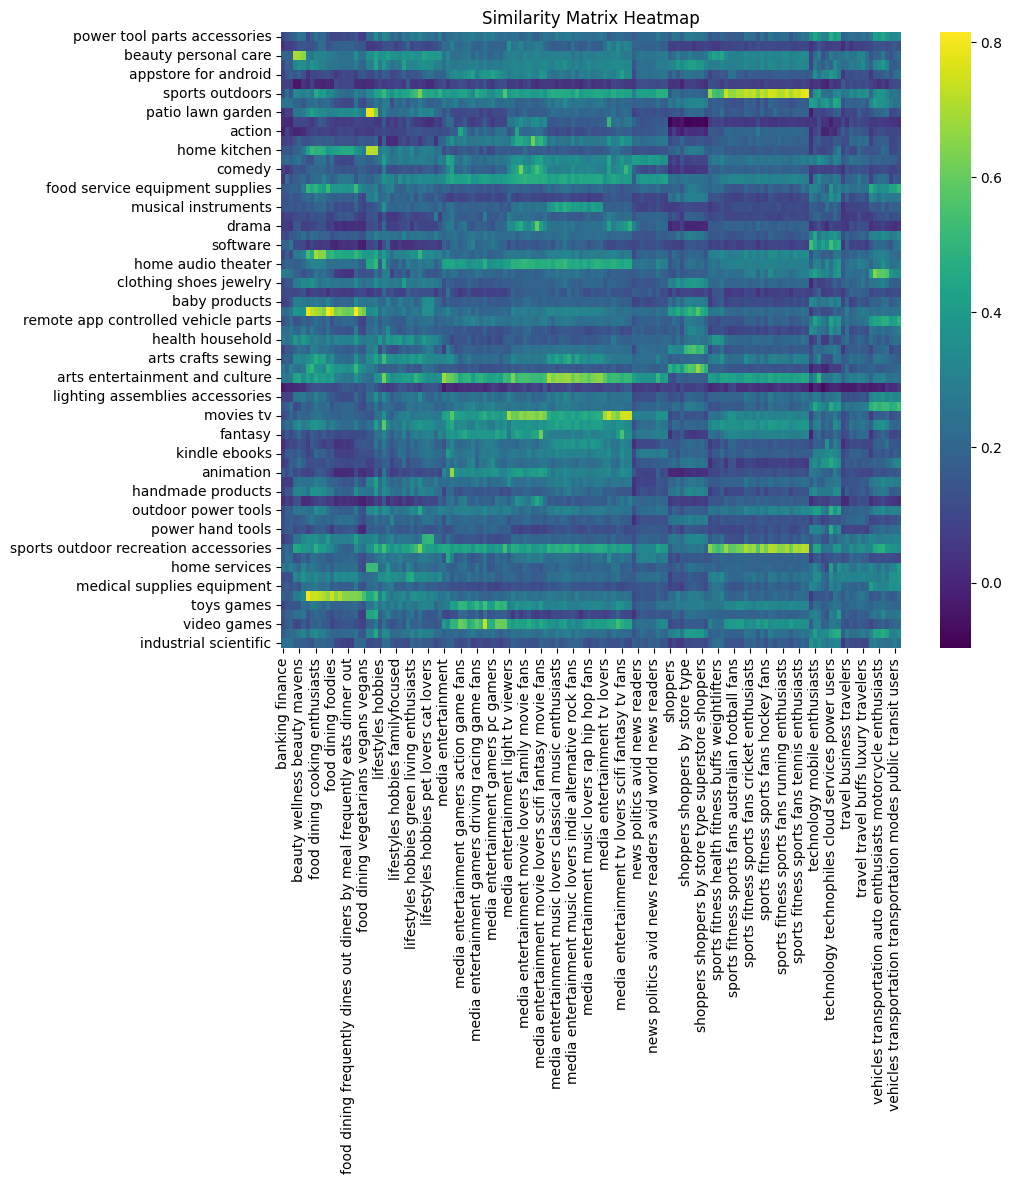

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df_w2v, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.show()

In [102]:
# Remove columns and rows with similarity below 0,2 (done but not working). Print resut (not done)
similarity_df_w2v_2 = similarity_df_w2v.copy()
similarity_df_w2v_2[similarity_df_w2v_2 < 0.5] = np.nan

similarity_df_w2v_2.head()

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
power tool parts accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unscripted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beauty personal care,NaN,NaN,NaN,0.701271,0.691312,0.654814,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shoe jewelry watch accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
appstore for android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


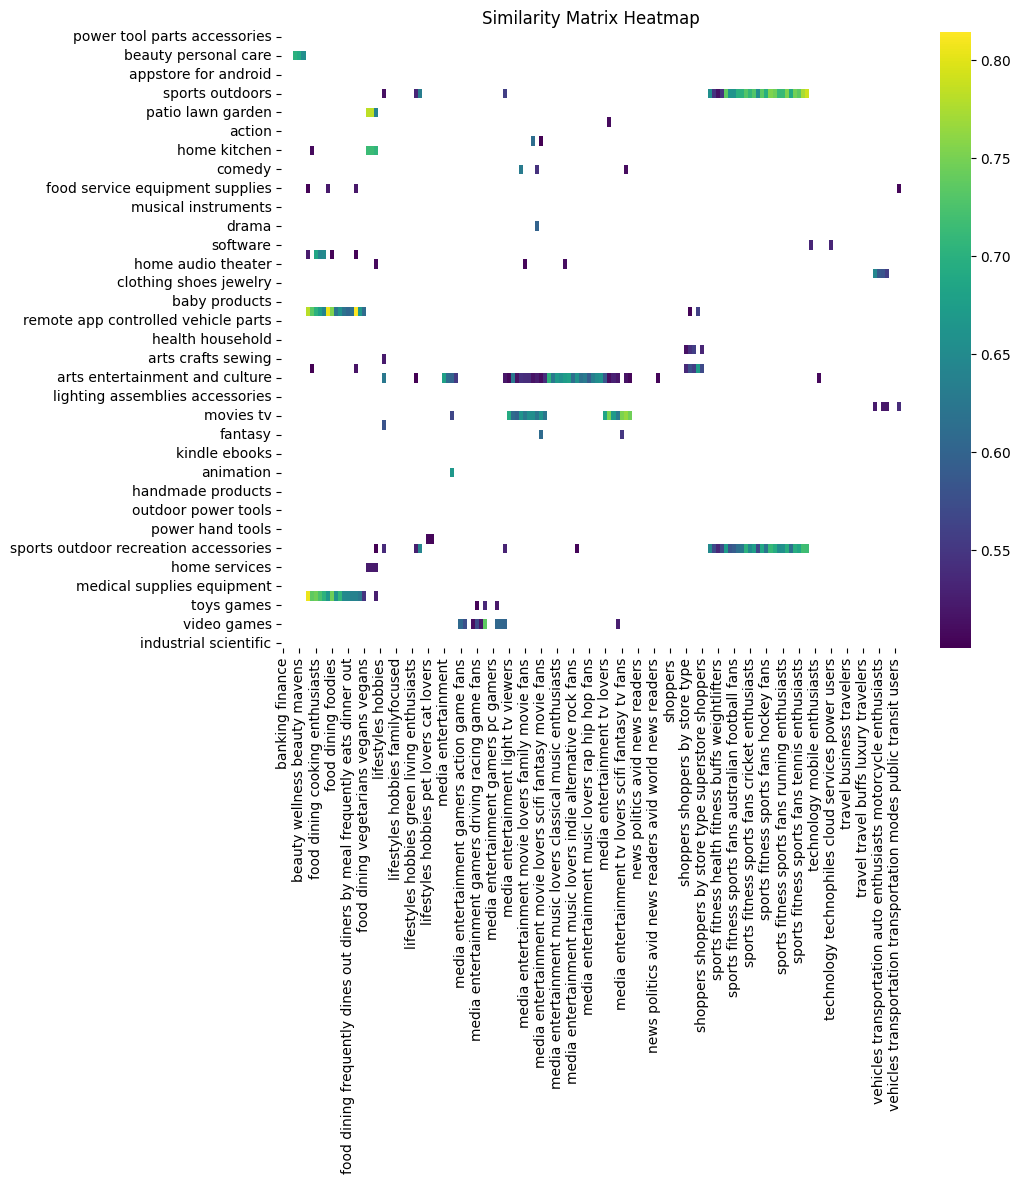

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df_w2v_2, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.show()

In [104]:
import json

# Reading from a JSON file
with open('../3_Summary_Stat/cluster.json', 'r') as json_file:
    data = json.load(json_file)

print(data)


{'4': ['https://www.amazon.com/gp/profile/amzn1.account.AGNHDR3ZK4AVQJYFFZVLNNPI6TDQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFFWEPJYSOGCZ7OZNZMVLJNXDL7Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFFWEPJYSOGCZ7OZNZMVLJNXDL7Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AF23C6LY5QSXP4ZMUSR2CUIAYR4Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AFWLWJARS5EHNPGWB6SSS7H3NCJA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AHUAXP7DAPXVFXA26SBAJBI435LA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AGKRIR6YVXDMFID4L5QOG4YBX7XA/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AEYAYWBB4A7UU23BFXK7XNED3K7A/ref=cm_cr_arp_d_gw_btm?ie=UTF8', 'https://www.amazon.com/gp/profile/amzn1.account.AGBJLCHM3QH7WLAX74EKRF4QNLAA/ref=cm_cr_arp_d_gw_btm?ie=U

In [105]:
def clean_breadcrumbs(category):
    # for category in unique_categories_website1:
        # Remove HTML tags and special characters using BeautifulSoup
    category_text = BeautifulSoup(str(category), 'html.parser').get_text()
    cleaned_category = re.sub(r'[^\w\s]', '', category_text)
    cleaned_category = cleaned_category.lower()  # Convert to lowercase
    cleaned_category = re.sub(' +', ' ', cleaned_category)  # Replace consecutive spaces
    # cleaned_categories.append(cleaned_category)
    return cleaned_category

In [106]:
df_website2 = df_website1

df_website2["categoryfirst_breadcrumb"] = df_website2["categoryfirst_breadcrumb"].apply(clean_breadcrumbs)

In [107]:
google_affinity_columns = similarity_df_w2v.columns

# Step 2: Map categoryfirst_breadcrumb to the Google affinity columns
mapped_rows = []
mapped_data = {}
for index in range(len(df_website2)):
    breadcrumb = df_website2.iloc[index]['categoryfirst_breadcrumb']
    
    # Create a dictionary to hold the mapped values

    for col in google_affinity_columns:
        # Check if the breadcrumb matches the column name
        if similarity_df_w2v.loc[breadcrumb, col] > 0.5:
            if col in mapped_data.keys():
                mapped_data[col].append(1)
            else:
                mapped_data[col] = [1]
        else:
            if col in mapped_data.keys():
                mapped_data[col].append(0)
            else:
                mapped_data[col] = [0]
            
    # mapped_rows.append(mapped_data)

# Step 3: Create the new dataframe
mapped_df = pd.DataFrame(mapped_data)

# Concatenate the second dataframe and the mapped dataframe
result_df = pd.concat([df_website2, mapped_df], axis=1)

# print(result_df)

In [108]:
similarity_df_w2v.loc['suspense', 'banking finance'] == 0

False

In [109]:
mapped_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
banking finance,16741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
banking finance avid investors,16741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
banking finance banks online,16741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
beauty wellness,16741.0,0.032077,0.176210,0.0,0.0,0.0,0.0,1.0
beauty wellness beauty mavens,16741.0,0.032077,0.176210,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,16741.0,0.061585,0.240408,0.0,0.0,0.0,0.0,1.0
vehicles transportation auto enthusiasts truck suv enthusiasts,16741.0,0.061585,0.240408,0.0,0.0,0.0,0.0,1.0
vehicles transportation transportation modes,16741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
vehicles transportation transportation modes public transit users,16741.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [110]:
result_df.head()

,Userprofile_url,Username,Reviewdate,Productname,review_title,review_text,categoryfirst_breadcrumb,allbreadcrumbs,price,urlproduct,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
0,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,"Auto World Diecast, 2018 Dodge Challenger SRT ...",A excellent replica of a modern classic!,Well executed and accurately detailed...Auto W...,toys games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Challenger-Worldwide-Di...,...,0,0,0,0,0,0,0,0,0,0
1,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Collectibles Greenlight 44940-E Hollywood Seri...,Real nice!,A beautifully done replica of a iconic car fro...,toys games,"Kids Gift Guide, Shop Toys by Character, Shop ...",price_unavailable,https://www.amazon.com/Collectibles-Greenlight...,...,0,0,0,0,0,0,0,0,0,0
2,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Nautica Men's Classic Cotton Loose Knit Boxer,Very comfortable!,Well made and the way the underwear look...is ...,clothing shoes jewelry,"Men, Clothing, Underwear, Boxers",$20.63,https://www.amazon.com/Nautica-Classic-Cotton-...,...,0,0,0,0,0,0,0,0,0,0
3,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,1980 Chevy Monte Carlo Yellow Limited Edition ...,A Beautiful car!,This diecast replica is so beautiful and accur...,arts crafts sewing,"Model & Hobby Building, Pre-Built & Diecast Mo...",price_unavailable,https://www.amazon.com/Limited-Worldwide-Johnn...,...,0,0,0,0,0,0,0,0,0,0
4,https://www.amazon.com/gp/profile/amzn1.accoun...,Damien Toler,01/11/2022,Johnny Lightning - Green Hornet 1966 Chrysler ...,A beautiful replica of a pop culture iconic ve...,It would be cool if the hood could open but ot...,toys games,"Vehicles, Cars & Race Cars",price_unavailable,https://www.amazon.com/Johnny-Lightning-Chrysl...,...,0,0,0,0,0,0,0,0,0,0


In [111]:
result_df["food dining foodies"].sum()

378

In [112]:
# Function to add clusters of each user
def get_cluster(val, dict_item):
    for key, value in dict_item.items():
        if val in value:
            return key
    return None

In [113]:
result_df2 = result_df.iloc[:, [0] + list(range(12, result_df.shape[1]))]

In [114]:
result_df2 = result_df2.groupby("Userprofile_url").max()

In [115]:
result_df2.reset_index(inplace=True)

In [116]:
result_df2["Userprofile_url"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1906 entries, 0 to 1905
Series name: Userprofile_url
Non-Null Count  Dtype 
--------------  ----- 
1906 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB


In [117]:
result_df2["Cluster"] = result_df2["Userprofile_url"].apply(get_cluster, args=(data,))

In [118]:
# result_df2.info(verbose=True, show_counts=True)

In [119]:
# Group data by cluster and take the max
result_df3 = result_df2.iloc[:, 1:].groupby("Cluster").max()

In [120]:
result_df3

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
1,0,0,0,0,0,0,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
2,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
3,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
4,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
5,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
6,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
7,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0


In [121]:
result_df4 = result_df3.reset_index()

In [122]:
# Function to add breadcrumbs
def add_breadcrumbs(x):
    x = str(x)
    crumbs = set()
    for user in data[x]:
        df_user = df_website1[df_website1["Userprofile_url"] == user].reset_index()
        for i in range(len(df_user)):
            c = df_user.iloc[i]["categoryfirst_breadcrumb"]
            for affinity in cleaned_categories2:
                if similarity_df.loc[c, affinity] > 0.2:
                    crumbs.add(c)
                    break
    return crumbs

In [123]:
result_df4

,Cluster,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
1,1,0,0,0,0,0,0,1,1,1,...,0,0,0,1,1,1,1,0,0,0
2,2,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
3,3,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
4,4,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
5,5,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
6,6,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0
7,7,0,0,0,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,0,0


In [124]:
result_df4["Crumbs"] = result_df4["Cluster"].apply(add_breadcrumbs)

In [44]:
# result_df4.info(verbose=True, show_counts=True)

In [125]:
# Print crumbs for each cluster
for i in range(len(result_df4)):

    print(result_df4["Crumbs"][i])

{'health household', 'drama', 'patio lawn garden', 'video games', 'home kitchen', 'power hand tools', 'tools home improvement', 'collectibles fine art', 'grocery gourmet food', 'beauty personal care', 'toys games', 'documentary', 'kindle store', 'action', 'comedy', 'pet supplies', 'sports outdoors', 'movies tv', 'grocery'}
{'health household', 'drama', 'patio lawn garden', 'video games', 'home kitchen', 'power hand tools', 'tools home improvement', 'grills outdoor cooking', 'collectibles fine art', 'grocery gourmet food', 'beauty personal care', 'toys games', 'documentary', 'kindle store', 'action', 'comedy', 'pet supplies', 'sports outdoors', 'movies tv'}
{'health household', 'kindle store', 'grocery gourmet food', 'video games', 'beauty personal care', 'home kitchen', 'toys games', 'action', 'comedy', 'power hand tools', 'home audio theater', 'pet supplies', 'documentary', 'tools home improvement', 'sports outdoors', 'movies tv', 'drama', 'patio lawn garden'}
{'health household', 'ki

In [46]:
# Describe dataset
summary=result_df4.describe(include='all')
summary=summary.transpose()
summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cluster,8,8,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banking finance,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banking finance avid investors,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
banking finance banks online,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beauty wellness,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
vehicles transportation auto enthusiasts truck suv enthusiasts,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vehicles transportation transportation modes,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vehicles transportation transportation modes public transit users,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vehicles transportation transportation modes taxi service users,8.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#Dictionary for lifestyles based in common/relevant nouns and 3-gram

lifestyle_dictionary = {
    'Activities Work': ['office', 'school', 'student', 'worker', 'musician', 'classroom'],
    'Activities Hobbies': ['hobbi', 'hobbyist', 'hobb'],
    'Activities Social Events': ['christma', 'halloween'],
    'Activities Vacation': ['travel', 'trip', 'camper', 'flight', 'hotel', 'vacat', 'passport', 'airport'],
    'Activities Entertainment': ['book', 'game', 'music', 'dvd', 'rock', 'film', 'gamer', 'gameplay', 'pocketbook', 'audiobook', 'movies'],
    'Activities Club Membership': ['doctor', 'teacher', 'restaur', 'church'],
    'Activities Community': ['friend', 'neighbor', 'uniform', 'neighborhood'],
    'Activities Sports': ['walk', 'bike', 'gym', 'golf', 'sport', 'basket', 'runner', 'athlet', 'yoga', 'bicycl', 'skate'],
    'Interests Family': ['son', 'daughter', 'wife', 'husband', 'kid', 'grandson', 'mom', 'granddaught', 'mother', 'child', 'children', 'brother', 'dad', 'nephew', 'sister', 'toddler', 'girlfriend', 'parent', 'boyfriend', 'father', 'grandchildren', 'grandkid', 'grandma', 'grandpa', 'grandmoth'],
    'Interests Home': ['bed', 'chair', 'kitchen', 'bathroom', 'yard', 'pool', 'grill', 'bedroom', 'decor', 'patio', 'porch', 'backyard'],
    'Interests Job': ['career', 'boss', 'manager', 'office', 'colleague'],
    'Interests Community': ['ipad', 'wrangler', 'alexa', 'macbook', 'garmin', 'dyson', 'phillip', 'disney', 'nike', 'starbuck', 'airbook'],
    'Interests Recreation': ['art', 'guitar', 'drone'],
    'Interests Fashion': ['shirt', 'shoe', 'boot', 'hat', 'sock', 'dress', 'jacket', 'glove', 'belt', 'cap', 'wallet', 'coat', 'sandal'],
    'Interests Food': ['tea', 'coffe', 'protein', 'wine', 'chees', 'fruit', 'beer', 'veget', 'pizza'],
    'Interests Media': ['tv', 'radio', 'youtub', 'facebook', 'tiktok', 'twitter'],
    'Interests Pets': ['dog', 'cat', 'bird', 'pet', 'kitten', 'aquarium', 'catbox']
}


In [48]:
df_cleaned_categories

,Cleaned Categories
0,power tool parts accessories
1,unscripted
2,beauty personal care
3,shoe jewelry watch accessories
4,appstore for android
...,...
60,toys games
61,tools home improvement
62,video games
63,small appliance parts accessories


In [49]:
# for category, keywords in lifestyle_dictionary.items():
#     df_cleaned_categories[category] = df_cleaned_categories['Cleaned Categories'].apply(lambda x: 1 if any(keyword in x for keyword in keywords) else 0)

In [50]:
def get_activities(x):
    activities = ""
    for category, keywords in lifestyle_dictionary.items():
        if any(keyword in x for keyword in keywords):
            activities += f"{category} "
    if len(activities) == 0:
        return np.nan
    return activities

In [51]:
df_cleaned_categories["Activities"] = df_cleaned_categories['Cleaned Categories'].apply(get_activities)

In [52]:
df_cleaned_categories

,Cleaned Categories,Activities
0,power tool parts accessories,Interests Recreation
1,unscripted,NaN
2,beauty personal care,Interests Family
3,shoe jewelry watch accessories,Interests Fashion
4,appstore for android,NaN
...,...,...
60,toys games,Activities Entertainment
61,tools home improvement,NaN
62,video games,Activities Entertainment
63,small appliance parts accessories,Interests Recreation


In [53]:
df_cleaned_categories.dropna(inplace=True)

In [54]:
df_cleaned_categories

,Cleaned Categories,Activities
0,power tool parts accessories,Interests Recreation
2,beauty personal care,Interests Family
3,shoe jewelry watch accessories,Interests Fashion
6,sports outdoors,Activities Sports
8,patio lawn garden,Interests Home
12,home kitchen,Interests Home
18,musical instruments,Activities Entertainment
23,grills outdoor cooking,Interests Home
26,clothing shoes jewelry,Interests Fashion
30,remote app controlled vehicle parts,Interests Recreation


In [55]:
all_categories = list(df_cleaned_categories['Activities']) + list(df_cleaned_categories2['Cleaned Categories2'])

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [56]:
# Fit and transform the vectorizer on the combined categories
vectorized_categories = vectorizer.fit_transform(all_categories)

In [57]:
# Transform text data
tfidf_categories = vectorizer.transform(df_cleaned_categories['Activities'])
tfidf_categories2 = vectorizer.transform(df_cleaned_categories2['Cleaned Categories2'])


In [58]:
# Calculate the cosine similarity between the vectorized categories
similarity_matrix = cosine_similarity(tfidf_categories, tfidf_categories2)


# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, columns=cleaned_categories2, index=df_cleaned_categories['Activities'])

# Write the similarity scores to an Excel file
similarity_df.to_excel('cousinesimilarity_scores.xlsx', index=True)

# Print the DataFrame
similarity_df.head()

,banking finance,banking finance avid investors,banking finance banks online,beauty wellness,beauty wellness beauty mavens,beauty wellness frequently visits salons,food dining,food dining coffee shop regulars,food dining cooking enthusiasts,food dining cooking enthusiasts 30 minute chefs,...,travel travel buffs luxury travelers,travel travel buffs snowbound travelers,vehicles transportation,vehicles transportation auto enthusiasts,vehicles transportation auto enthusiasts motorcycle enthusiasts,vehicles transportation auto enthusiasts performance luxury vehicle enthusiasts,vehicles transportation auto enthusiasts truck suv enthusiasts,vehicles transportation transportation modes,vehicles transportation transportation modes public transit users,vehicles transportation transportation modes taxi service users
Activities,,,,,,,,,,,,,,,,,,,,,
Interests Recreation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interests Family,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interests Fashion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Activities Sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interests Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


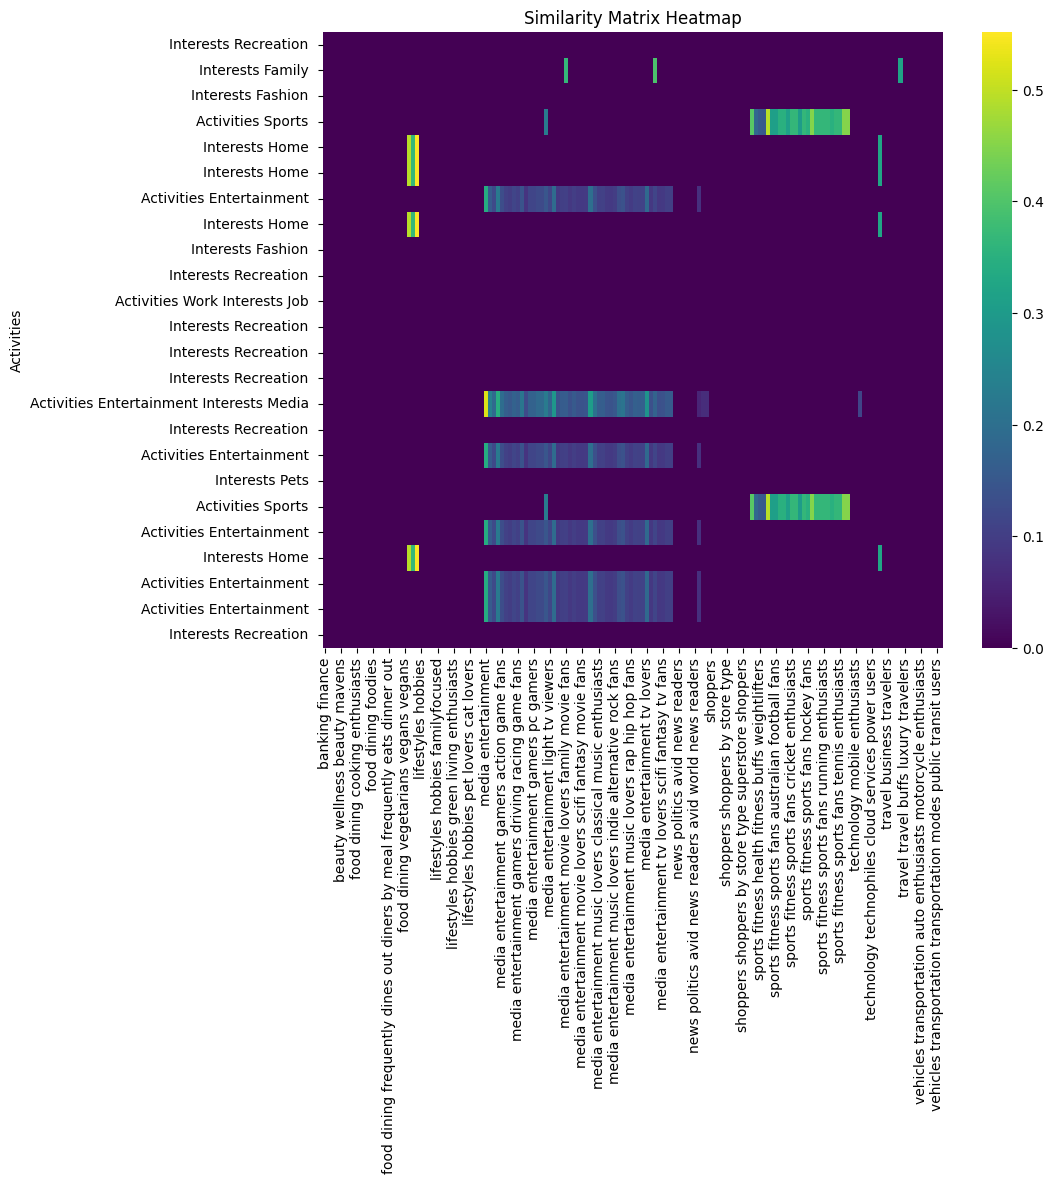

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.show()

In [60]:
# Remove columns and rows with similarity below 0,2 (done but not working). Print resut (not done)
similarity_df2 = similarity_df.copy()
similarity_df2[similarity_df2 < 0.2] = np.nan

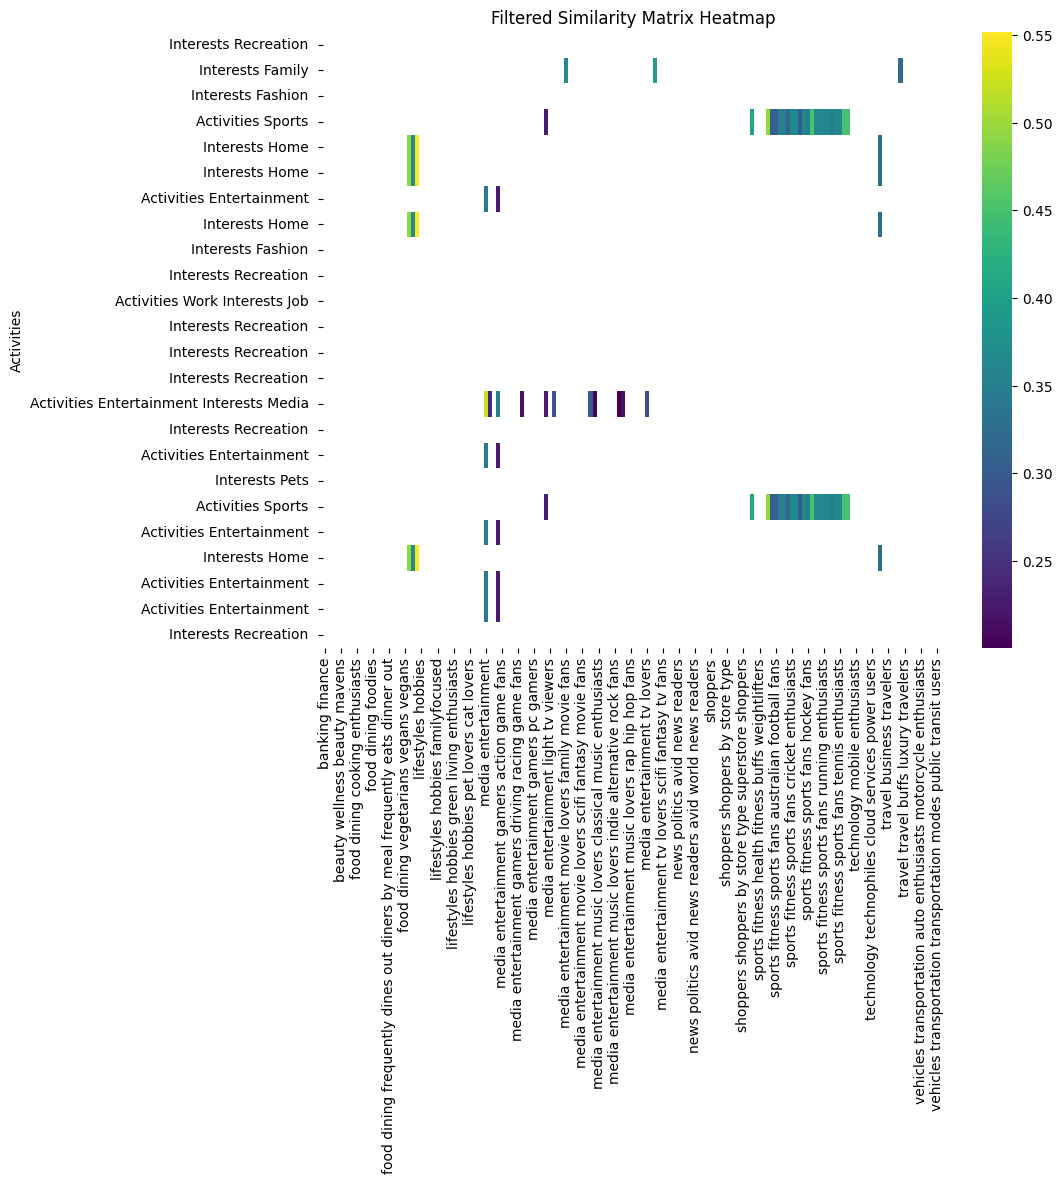

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df2, cmap='viridis')
plt.title("Filtered Similarity Matrix Heatmap")
plt.show()

In [62]:
similarity_df.shape

(24, 154)

In [63]:
# # Remove Google Columns with less than 0,2 similarity

# # Set the threshold
# # threshold = 0.2

# # Create a mask based on the similarity condition
# # similarity_df[similarity_df < 0.2] = np.nan

# # Exclude the first column from the mask
# similarity_df[0] = False

# # Filter rows and columns based on the mask
# filtered_matrix = similarity_matrix[mask]

# # Convert the filtered_matrix to a DataFrame
# filtered_df = pd.DataFrame(similarity_df)

# # Export the DataFrame to an Excel file
# filtered_df.to_excel('filtered_similarity_matrix.xlsx', index=False) 

# # Print the filtered DataFrame
# print(filtered_matrix)


In [64]:
# Create a dataframe considering AIO clusters, existing first breadcrumbs  for each cluster, and when those breadcrumbs match a google afinity mark 1. Marl zero if they don't.